In [1]:

from tensorflow.keras.models import load_model


model = load_model('./logs/n_.h5')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               6422784   
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dense_11 (Dense)             (None, 149)               38293     
Total params: 21,176,789
Trainable params: 13,541,013
Non-trainable params: 7,635,776
_________________________________________________________________


In [2]:
import json
with open("classes.txt", "r") as fp:
    classes = json.load(fp)

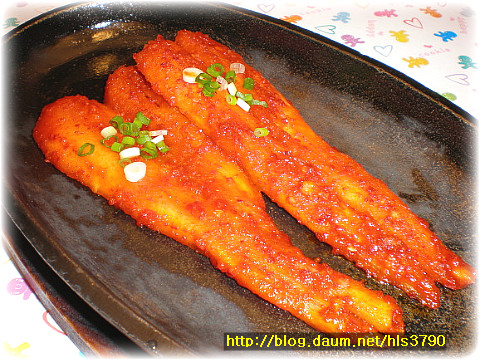

예측 :  갈치조림


In [5]:
from PIL import Image
import numpy as np
%matplotlib inline

tst_img_rt='./Img_005_0054.jpg'
tst = Image.open(tst_img_rt)
display(tst)
tst=tst.resize((224,224))
tst=np.expand_dims(tst,axis=0)
prd=model.predict(tst)
prd=np.argmax(prd[0])

print('예측 : ',classes[prd])

In [4]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = 'D:/빅데이터기반지능형서비스개발/06ai서비스개발pjt/data_split/test'

tst_image_generator = ImageDataGenerator(rescale=1./255)

tst_data_gen = tst_image_generator.flow_from_directory(batch_size=32,
                                                         directory=test_dir,
                                                         target_size=(224, 224),
                                                         class_mode='categorical',
                                                      shuffle=False)

Found 30039 images belonging to 149 classes.


In [7]:
tst_data_gen.reset()
Y_pred = model.predict_generator(tst_data_gen, 30039/32+1)#validation_generator.n // validation_generator.batch_size+1)


KeyboardInterrupt: 

In [8]:
import numpy as np

y_pred = np.argmax(Y_pred, axis=1) 

cm=confusion_matrix(tst_data_gen.classes, y_pred)
tot=np.sum(cm,axis=1)
cm1=cm/tot[:,None]
cm1

array([[0.66169154, 0.00497512, 0.02985075, ..., 0.        , 0.00497512,
        0.        ],
       [0.00497512, 0.70646766, 0.01492537, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.65671642, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.0049505 , 0.        , ..., 0.28712871, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.79104478,
        0.        ],
       [0.00995025, 0.        , 0.02985075, ..., 0.        , 0.        ,
        0.35323383]])

In [9]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

<AxesSubplot:>

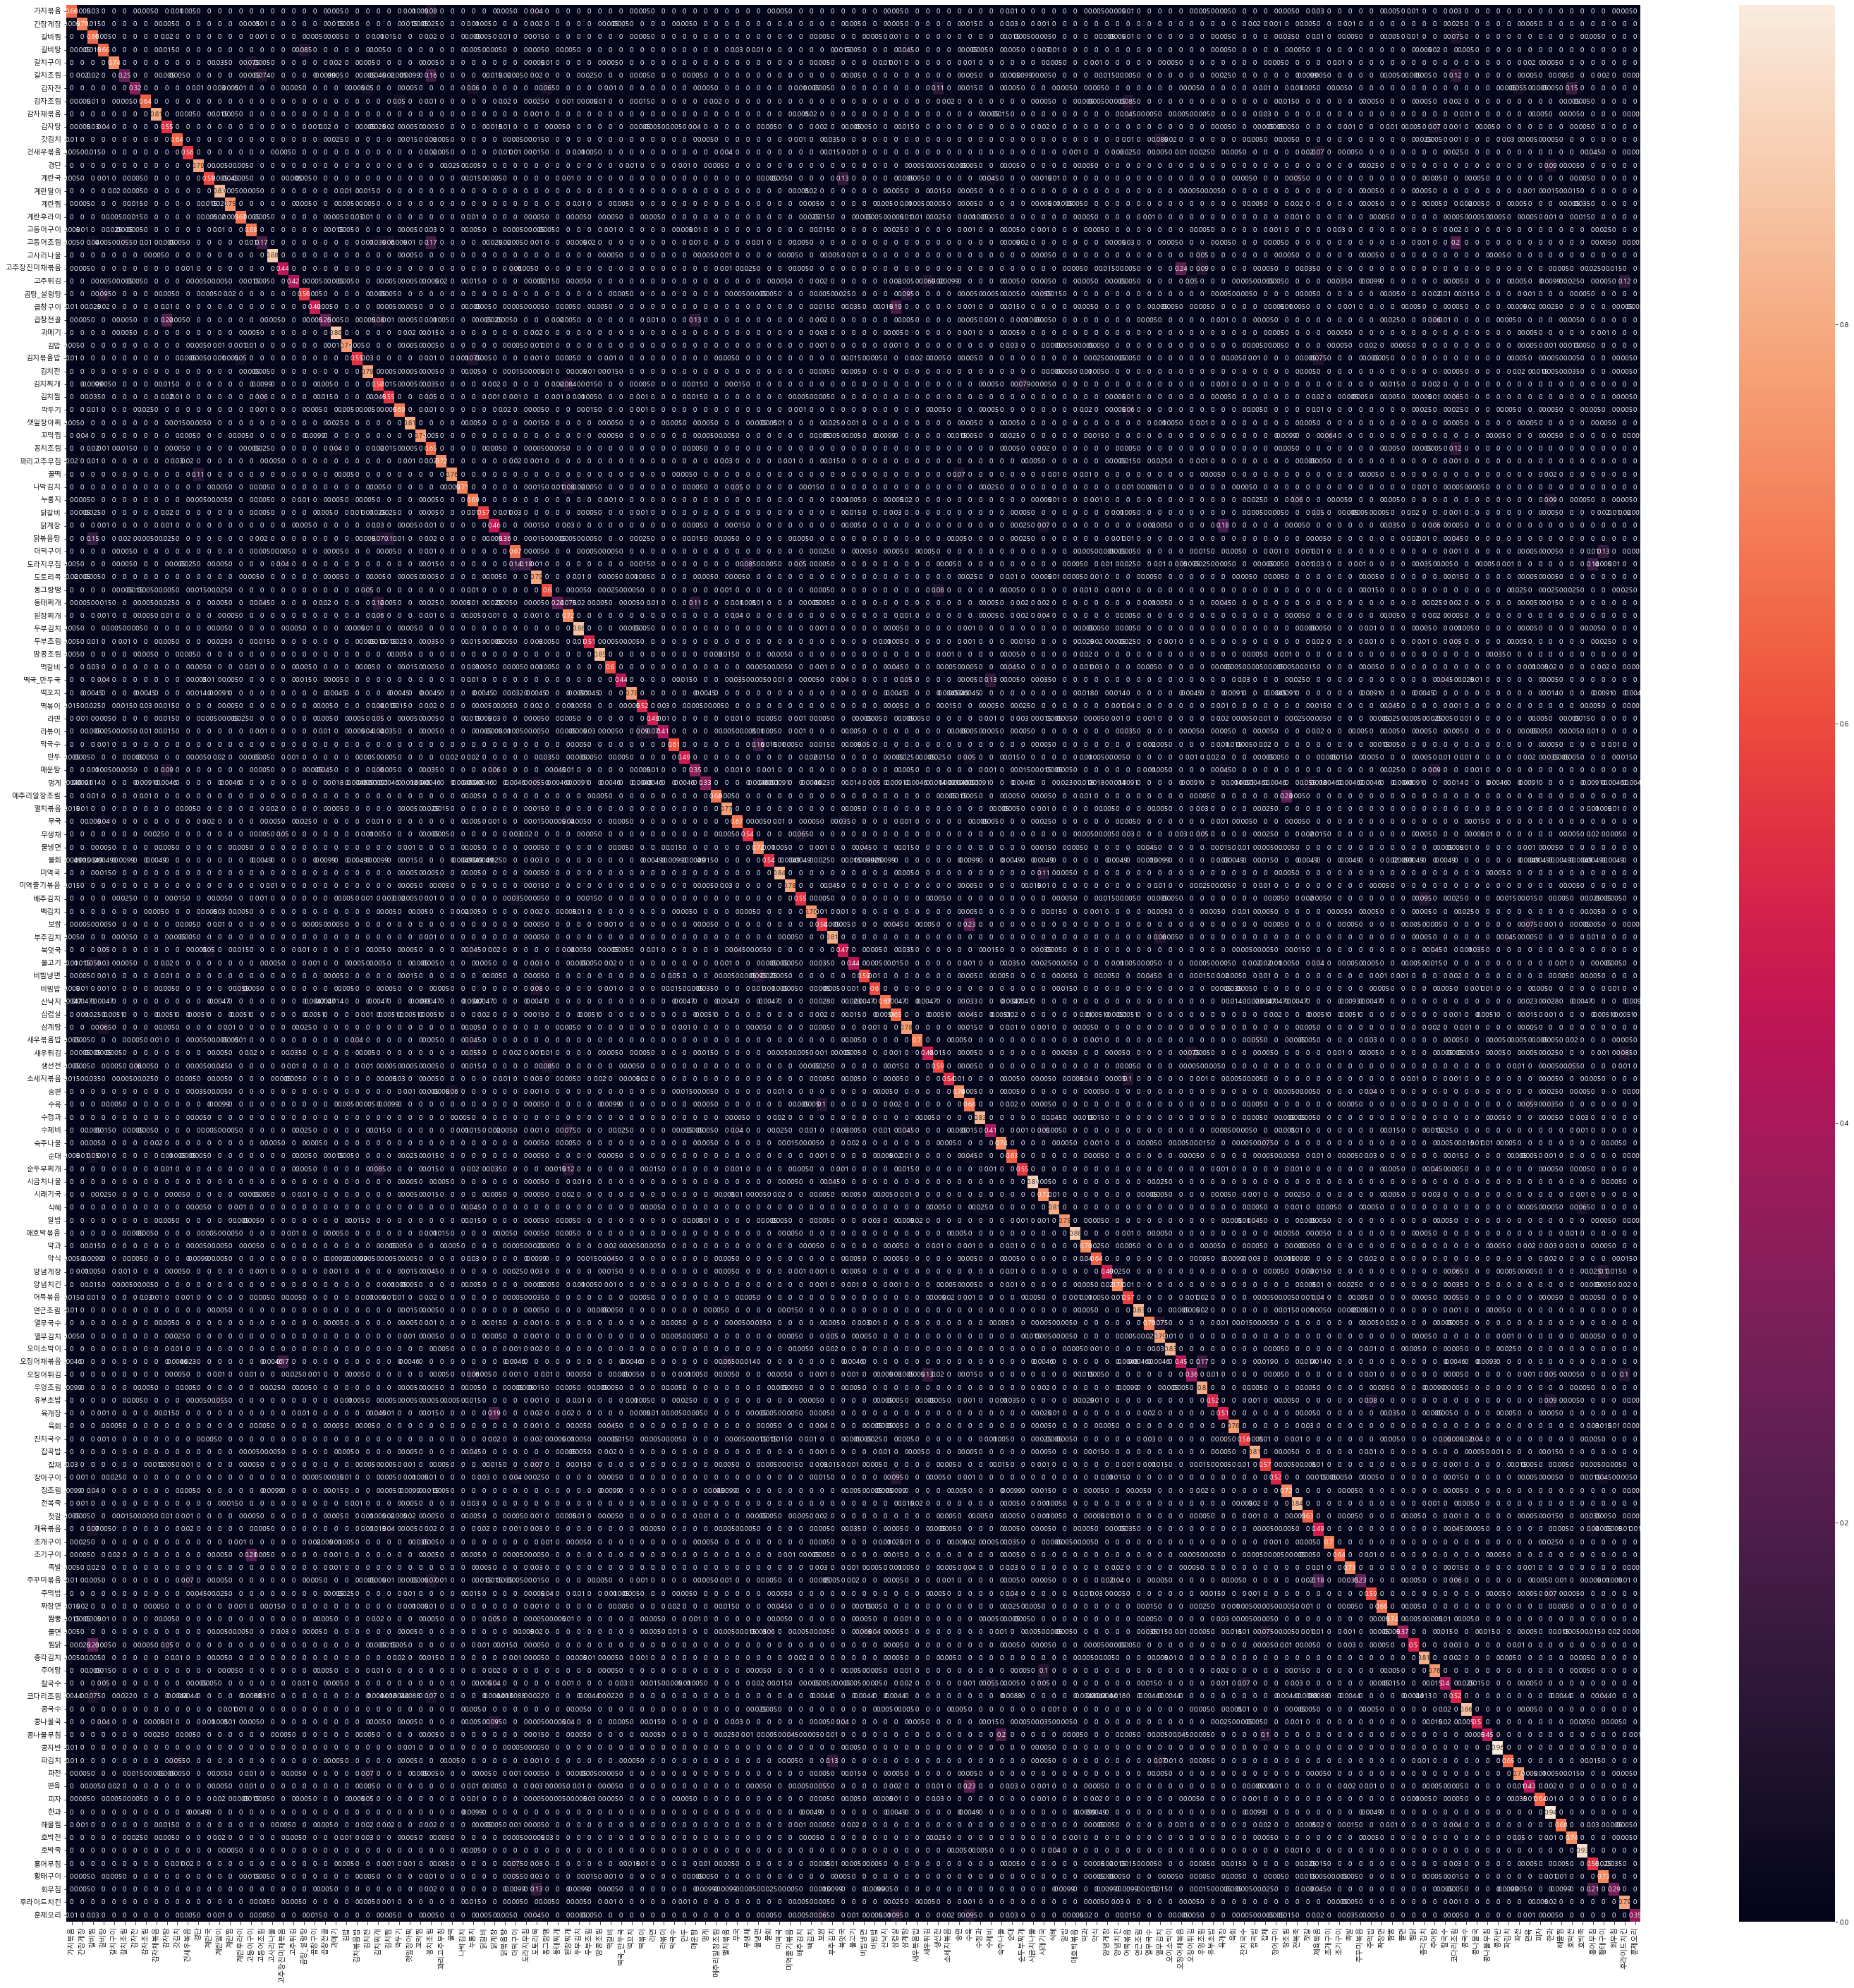

In [13]:
df_cm = pd.DataFrame(cm1,
                     index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (50,50))
sn.heatmap(df_cm, annot=True)

In [72]:
import os
rt='D:\\빅데이터기반지능형서비스개발\\06ai서비스개발pjt\\data_split\\test\\'
classes=os.listdir(rt)
from PIL import Image
import numpy as np
for i in range(len(classes)):                                                                          
    tmp_rt=rt+classes[i]
    d=os.listdir(tmp_rt)[28]   
    tst = Image.open(tmp_rt+'\\'+d)
    tst=tst.resize((224,224))
    
    tst=np.expand_dims(tst,axis=0)
    tst=tst[:,:,:,:3]
    prd=model.predict_generator(tst)
    if np.argmax(prd[0])==i:
        print('num_prd',np.argmax(prd[0]),classes[np.argmax(prd[0])],'real',i,classes[i])

num_prd 4 갈치구이 real 4 갈치구이
num_prd 17 고등어구이 real 17 고등어구이
num_prd 22 곰탕_설렁탕 real 22 곰탕_설렁탕
num_prd 25 과메기 real 25 과메기
num_prd 26 김밥 real 26 김밥
num_prd 31 깍두기 real 31 깍두기
num_prd 36 꿀떡 real 36 꿀떡
num_prd 37 나박김치 real 37 나박김치
num_prd 51 떡갈비 real 51 떡갈비
num_prd 53 떡꼬치 real 53 떡꼬치
num_prd 54 떡볶이 real 54 떡볶이
num_prd 61 메추리알장조림 real 61 메추리알장조림
num_prd 63 무국 real 63 무국
num_prd 67 미역국 real 67 미역국
num_prd 71 보쌈 real 71 보쌈
num_prd 76 비빔밥 real 76 비빔밥
num_prd 84 송편 real 84 송편
num_prd 86 수정과 real 86 수정과
num_prd 91 시금치나물 real 91 시금치나물
num_prd 92 시래기국 real 92 시래기국
num_prd 93 식혜 real 93 식혜
num_prd 95 애호박볶음 real 95 애호박볶음
num_prd 98 양념게장 real 98 양념게장
num_prd 99 양념치킨 real 99 양념치킨
num_prd 107 우엉조림 real 107 우엉조림
num_prd 108 유부초밥 real 108 유부초밥
num_prd 111 잔치국수 real 111 잔치국수
num_prd 117 젓갈 real 117 젓갈
num_prd 119 조개구이 real 119 조개구이
num_prd 121 족발 real 121 족발
num_prd 124 짜장면 real 124 짜장면
num_prd 127 찜닭 real 127 찜닭
num_prd 135 콩자반 real 135 콩자반
num_prd 136 파김치 real 136 파김치
num_prd 137 파전 real 137 파전
num_prd 140

In [42]:
12 22 = 38/149


0.2550335570469799

In [61]:
40/149

0.2684563758389262